In [3]:
#Importing required packages

import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400 
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from numpy import mean
from numpy import std

In [4]:
# Importing the dataset

train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')
train_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data.drop('Unnamed: 0',axis=1,inplace=True)
df_headers=['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']
train_data.set_axis(df_headers,axis=1,inplace=True)
test_data.set_axis(df_headers,axis=1,inplace=True)

In [5]:
# Defining training and test data for use in the Random Forest algorithm

x_train=train_data.loc[:,train_data.columns != 'default payment next month']
y_train=train_data['default payment next month']
x_test=test_data.loc[:,test_data.columns != 'default payment next month']
y_test=test_data['default payment next month']

In [7]:
# Performing Gridsearch to determine the optimal hyperparameters 

rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

rf_params_ex = {'n_estimators':list(range(10,110,10)),'max_depth':list(range(1,11,1))}

cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='f1',
                        n_jobs=None, refit=True, cv=cv, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

cv_rf_ex.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_depth=3, max_features='auto',
                                              n_estimators=10, random_state=4),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='f1',
             verbose=1)

In [8]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [9]:
# Viewing the summary of Gridsearch runs

cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.054012,0.001990,0.005715,0.000452,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.103358,0.002380,0.007947,0.000160,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.158121,0.009061,0.011245,0.000899,1,30,"{'max_depth': 1, 'n_estimators': 30}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.201949,0.005336,0.014179,0.000890,1,40,"{'max_depth': 1, 'n_estimators': 40}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.246314,0.008387,0.014683,0.000159,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.594223,0.015783,0.034562,0.000560,10,60,"{'max_depth': 10, 'n_estimators': 60}",0.428571,0.437436,0.446162,0.457490,0.442415,0.010697,9,0.538527,0.554539,0.553726,0.540964,0.546939,0.007251
96,1.871930,0.020983,0.041708,0.002261,10,70,"{'max_depth': 10, 'n_estimators': 70}",0.432718,0.437755,0.448791,0.456069,0.443833,0.009149,4,0.538409,0.558147,0.554118,0.543415,0.548523,0.007942
97,2.102369,0.009606,0.045922,0.000693,10,80,"{'max_depth': 10, 'n_estimators': 80}",0.430313,0.437532,0.448560,0.456389,0.443198,0.010011,6,0.538370,0.557172,0.552206,0.541376,0.547281,0.007687
98,2.383500,0.035484,0.051337,0.000580,10,90,"{'max_depth': 10, 'n_estimators': 90}",0.431062,0.438105,0.449022,0.455144,0.443333,0.009351,5,0.538711,0.556628,0.553184,0.543508,0.548008,0.007207


In [10]:
# Getting the values of optimal hyperparameters obtained from Gridsearch

cv_rf_ex.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [14]:
#Creating a list that contains the column names (features and the response)
features_response = train_data.columns.tolist()

#Removing columns that are not considered as features for modelling purposes
items_to_remove = ['Unnamed: 0','ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

# Removing elements in the items_to_remove from the all_features list
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [17]:
# Getting the importances of features

feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.382107
0,LIMIT_BAL,0.063931
11,PAY_AMT1,0.060395
6,BILL_AMT2,0.051179
5,BILL_AMT1,0.048337
12,PAY_AMT2,0.048051
7,BILL_AMT3,0.043926
9,BILL_AMT5,0.039287
8,BILL_AMT4,0.038385
13,PAY_AMT3,0.037391


Text(0, 0.5, 'Maximum depth')

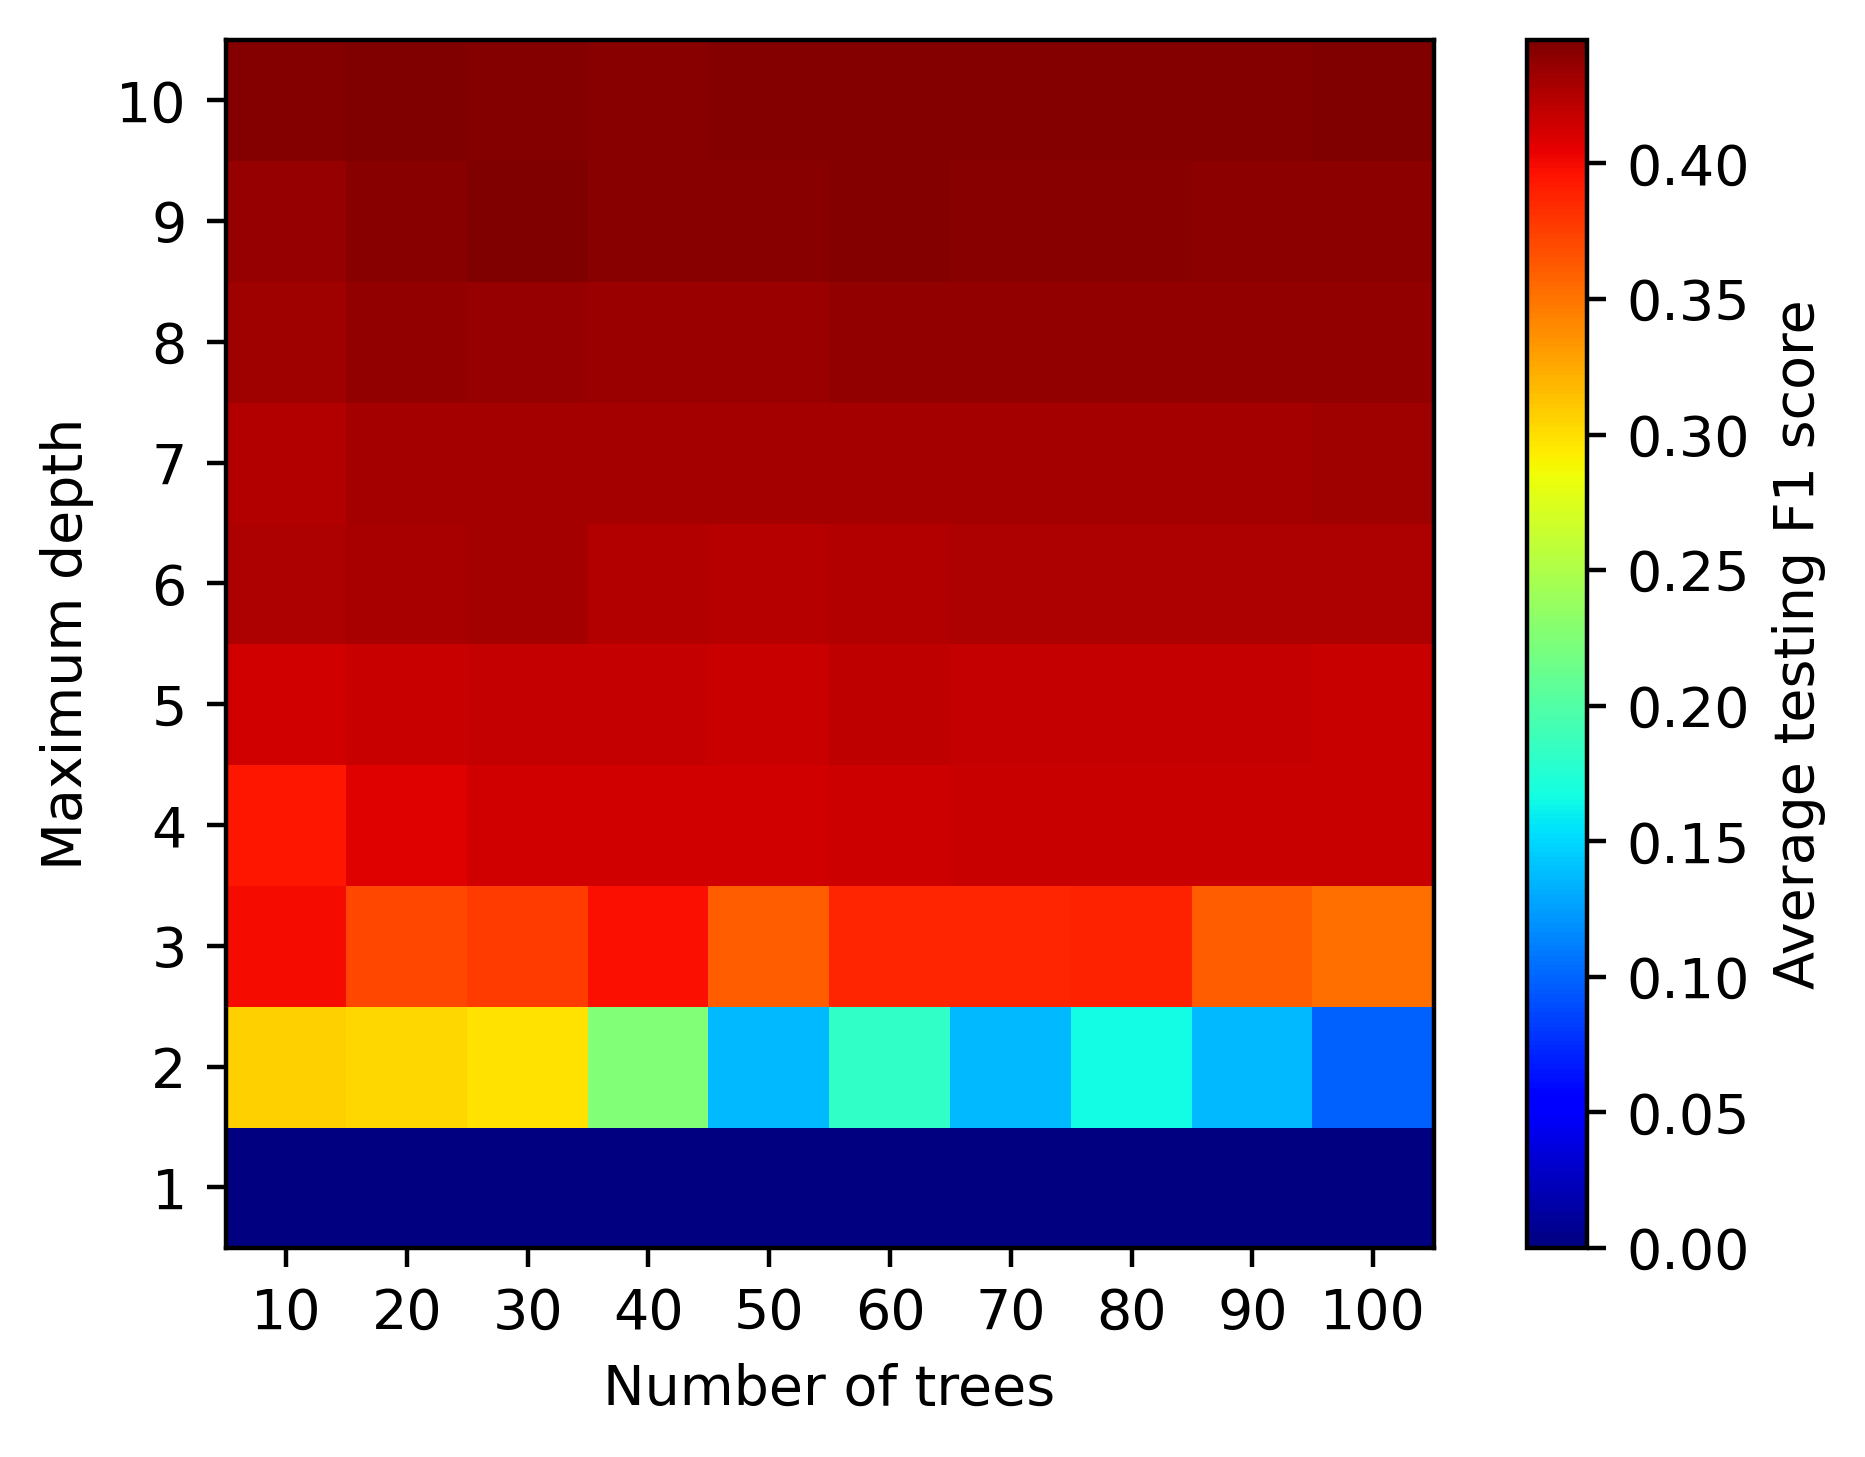

In [25]:
xx_rf, yy_rf = np.meshgrid(range(11), range(11))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_ex_results_df['mean_test_score'].values.reshape((10,10)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing F1 score')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5,4.5,5.5,6.5,7.5,8.5,9.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5,4.5,5.5,6.5,7.5,8.5,9.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params_ex['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params_ex['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [33]:
# Increasing the number of trees to examine its effect on model performance

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

rf_params = {'max_depth':[9,10,11,12],
             'n_estimators':[100, 150, 200, 250]}
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='f1',
                  n_jobs=-1, refit=True, cv=cv, verbose=2,
                  error_score=np.nan, return_train_score=True)
cv_rf.fit(x_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_depth=3, max_features='auto',
                                              n_estimators=10, random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11, 12],
                         'n_estimators': [100, 150, 200, 250]},
             return_train_score=True, scoring='f1', verbose=2)

In [34]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

Text(0, 0.5, 'Maximum depth')

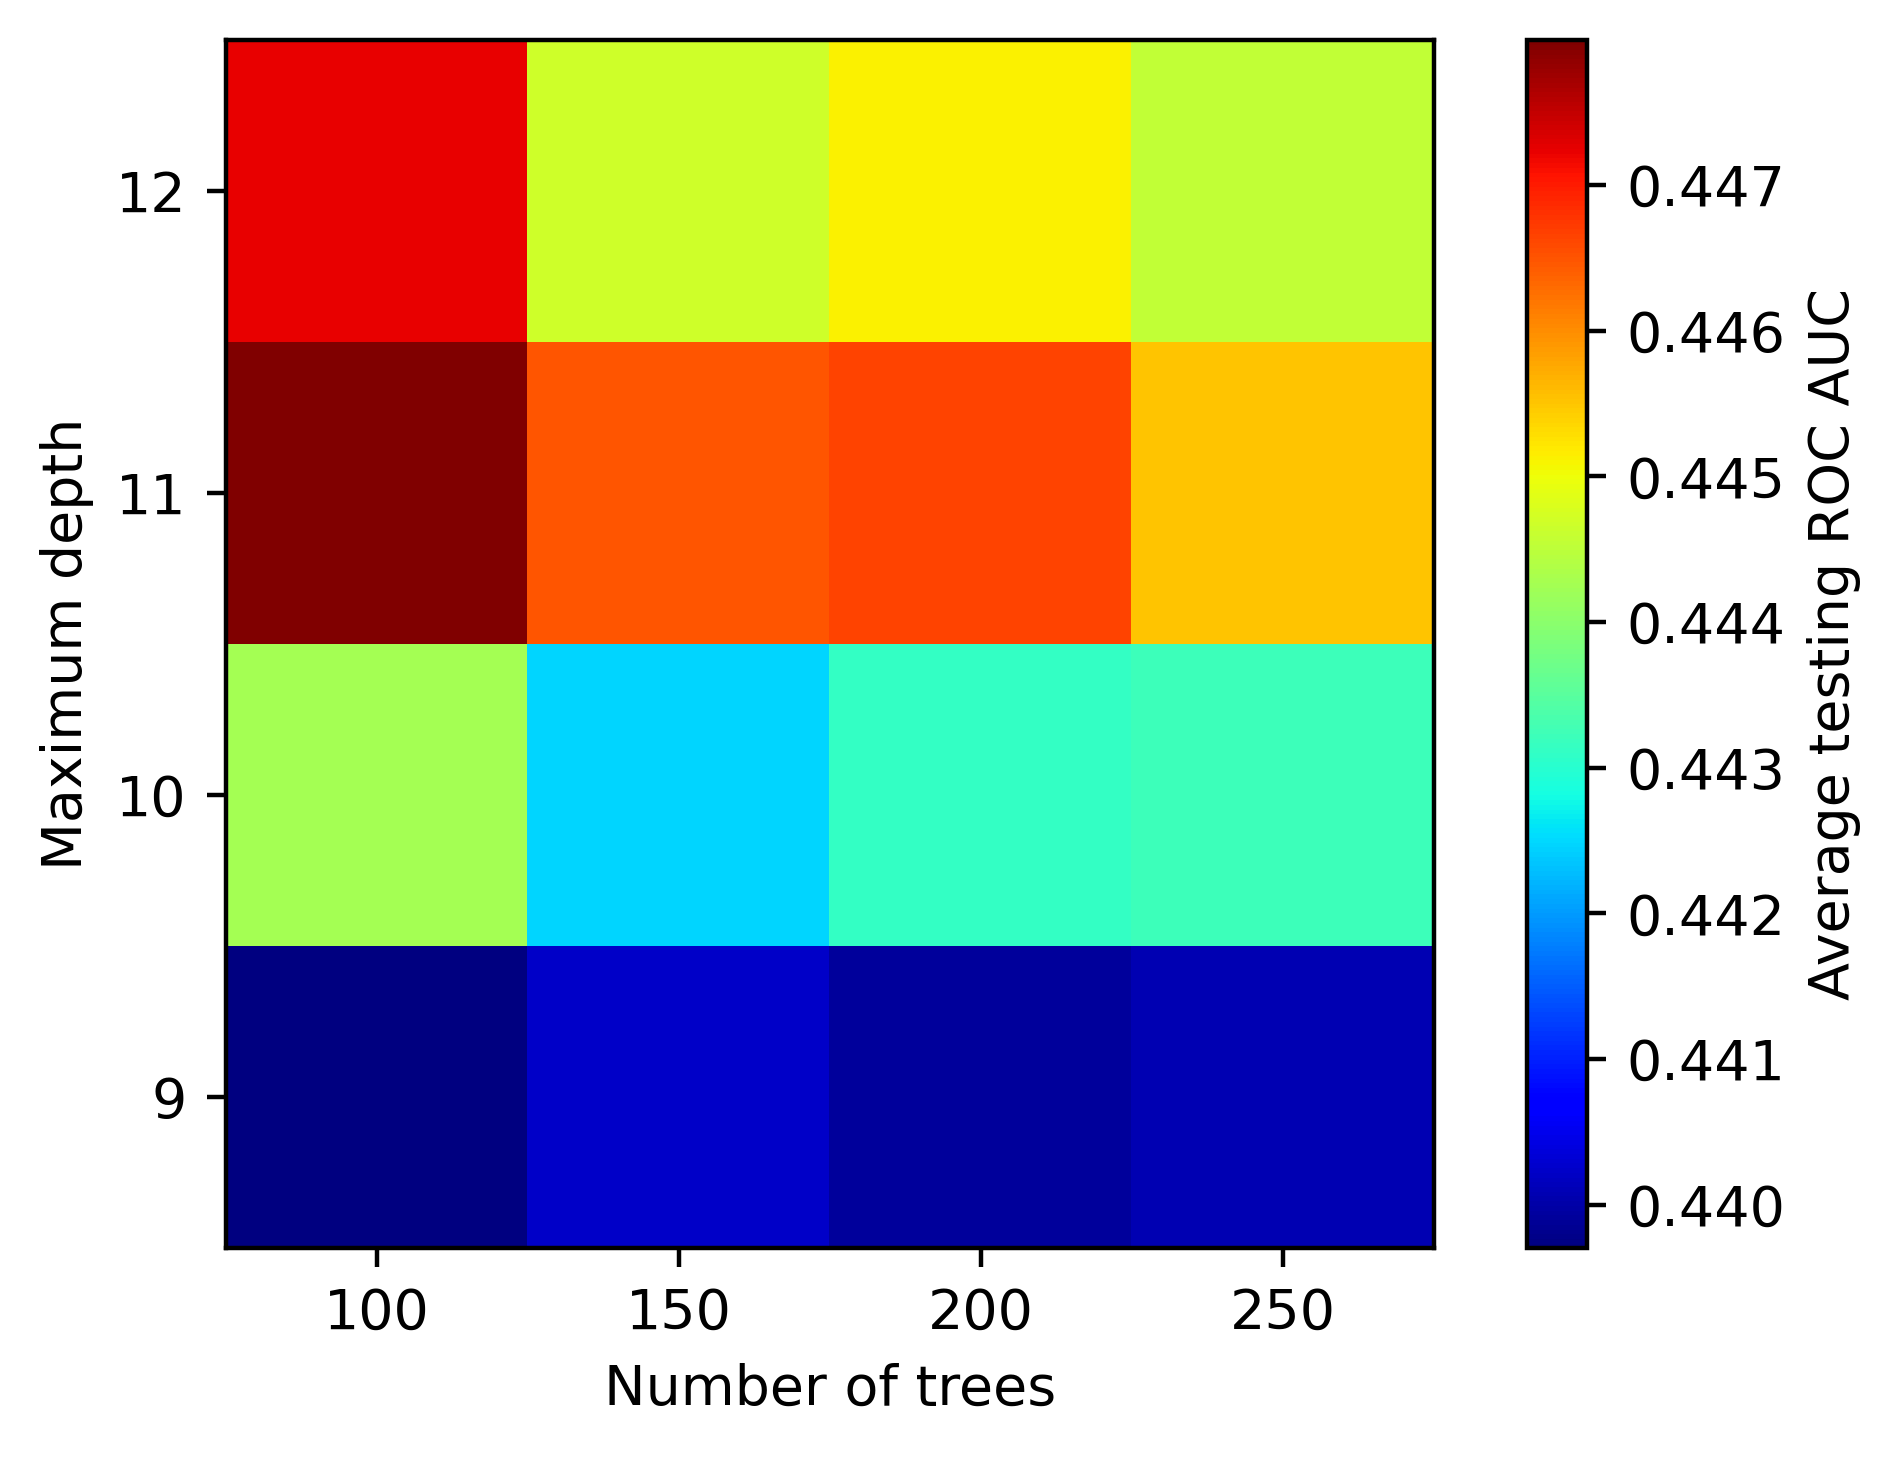

In [36]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [37]:
# Increasing the number of trees to examine its effect on model performance

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

rf_params = {'max_depth':[12,13,14,15],
             'n_estimators':[250, 300, 350, 400]}
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='f1',
                  n_jobs=-1, refit=True, cv=cv, verbose=2,
                  error_score=np.nan, return_train_score=True)
cv_rf.fit(x_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_depth=3, max_features='auto',
                                              n_estimators=10, random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15],
                         'n_estimators': [250, 300, 350, 400]},
             return_train_score=True, scoring='f1', verbose=2)

In [38]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

Text(0, 0.5, 'Maximum depth')

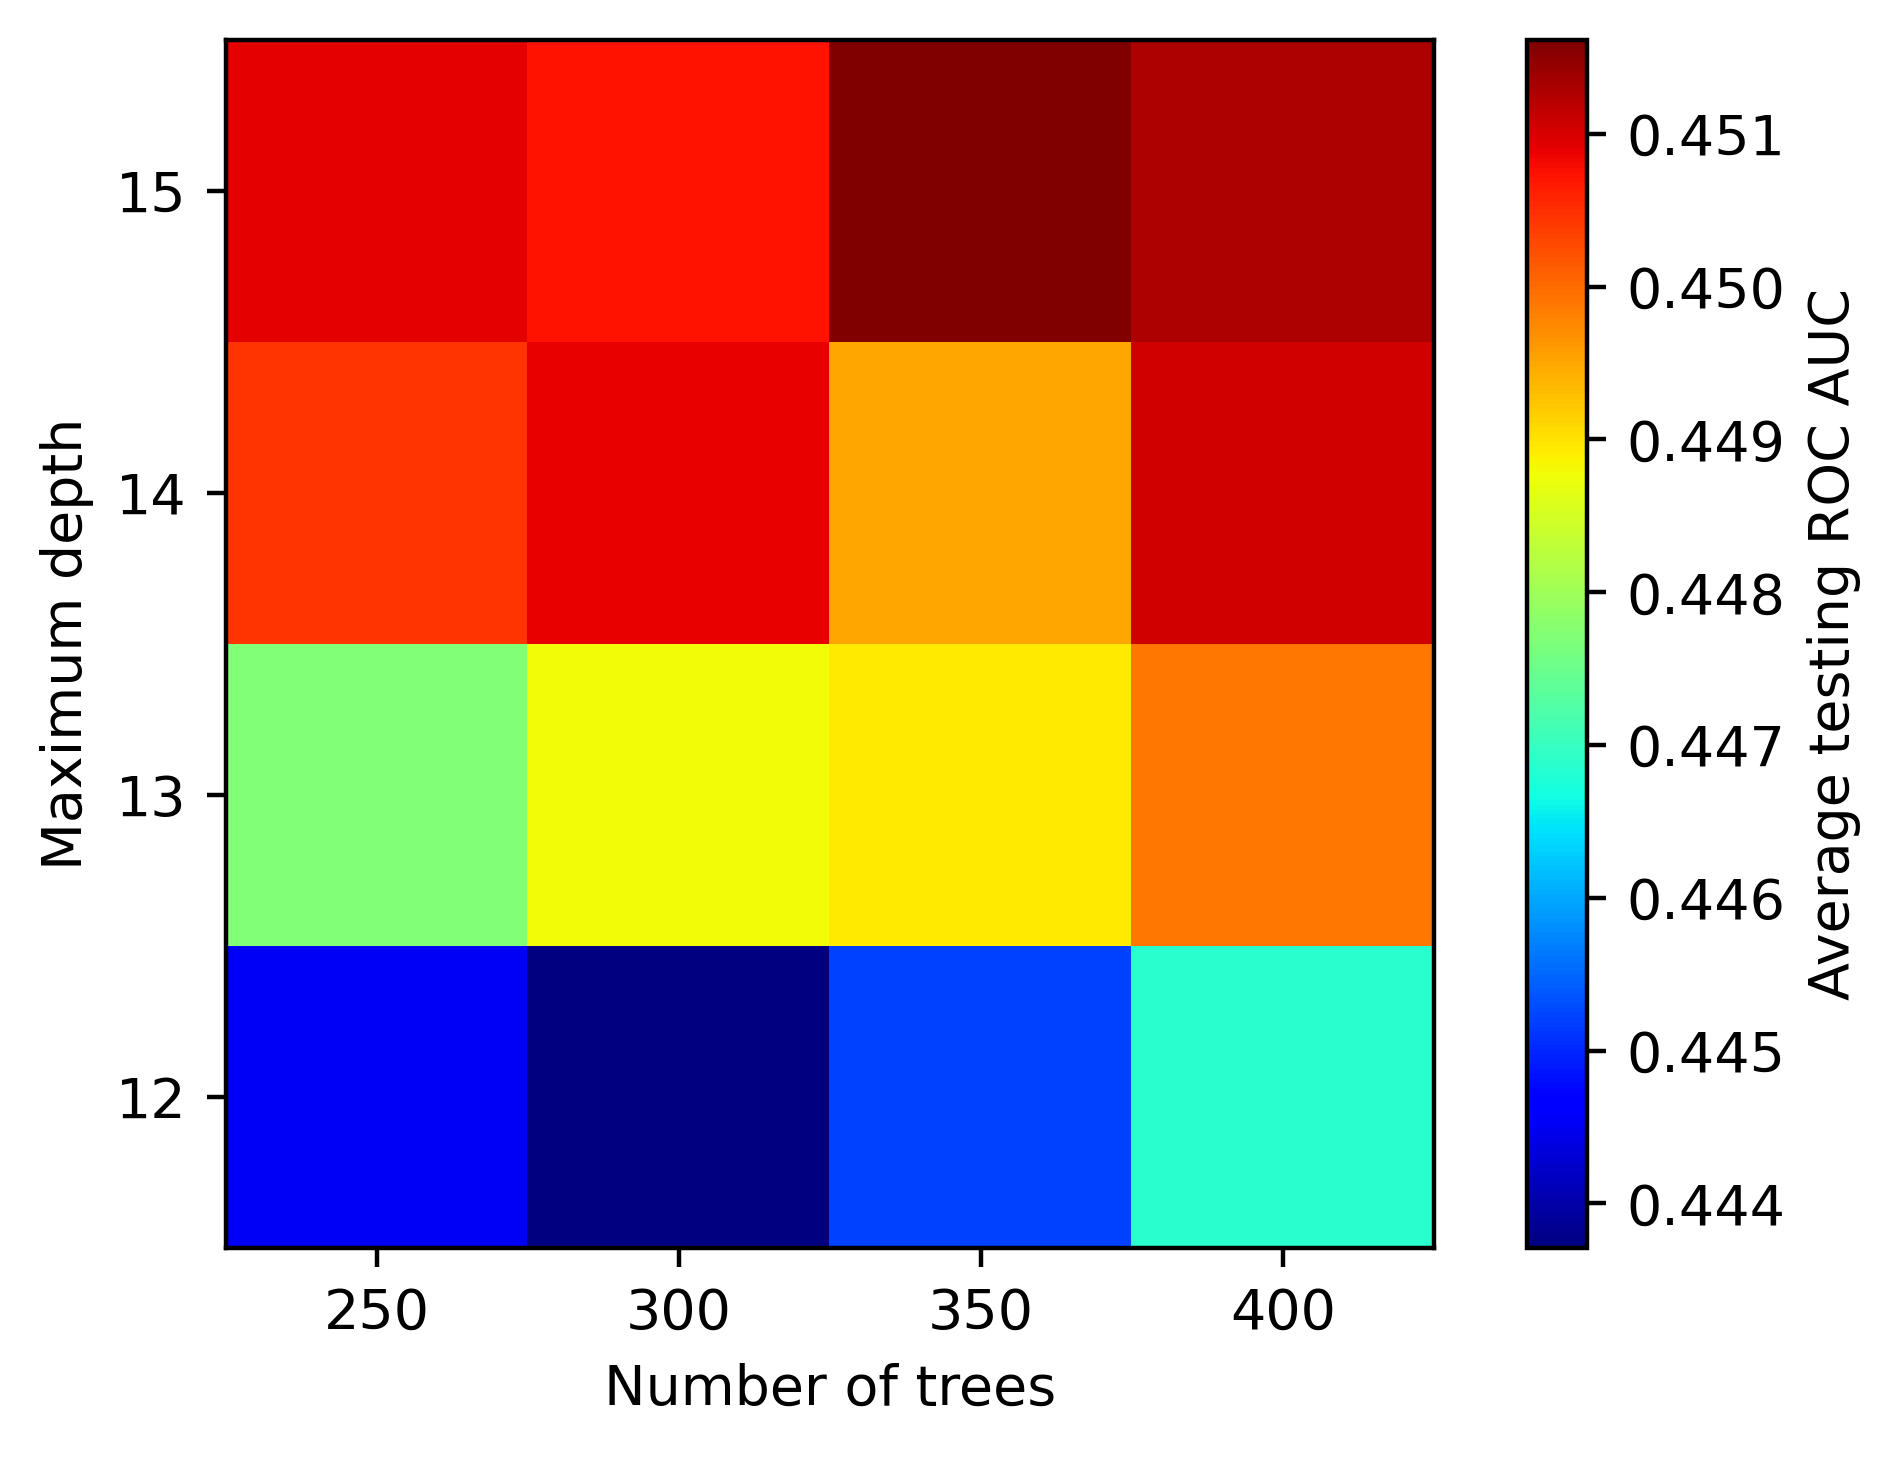

In [39]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [40]:
cv_rf.best_params_

{'max_depth': 15, 'n_estimators': 350}

In [56]:
rf = RandomForestClassifier\
(n_estimators=350, criterion='gini', max_depth=15,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf.score(x_test,y_test)

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8149208487706299

In [57]:
# Getting the results

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

Precision: 0.640
Recall: 0.321
Accuracy: 0.815
F1 Score: 0.427
ROC_AUC Score: 0.769


In [43]:
# Increasing the number of trees to examine its effect on model performance

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

rf_params = {'max_depth':[12,13,14,15],
             'n_estimators':[400, 500, 600,700]}
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='f1',
                  n_jobs=-1, refit=True, cv=cv, verbose=2,
                  error_score=np.nan, return_train_score=True)
cv_rf.fit(x_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_depth=15, max_features='auto',
                                              n_estimators=350,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15],
                         'n_estimators': [400, 500, 600, 700]},
             return_train_score=True, scoring='f1', verbose=2)

In [44]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

Text(0, 0.5, 'Maximum depth')

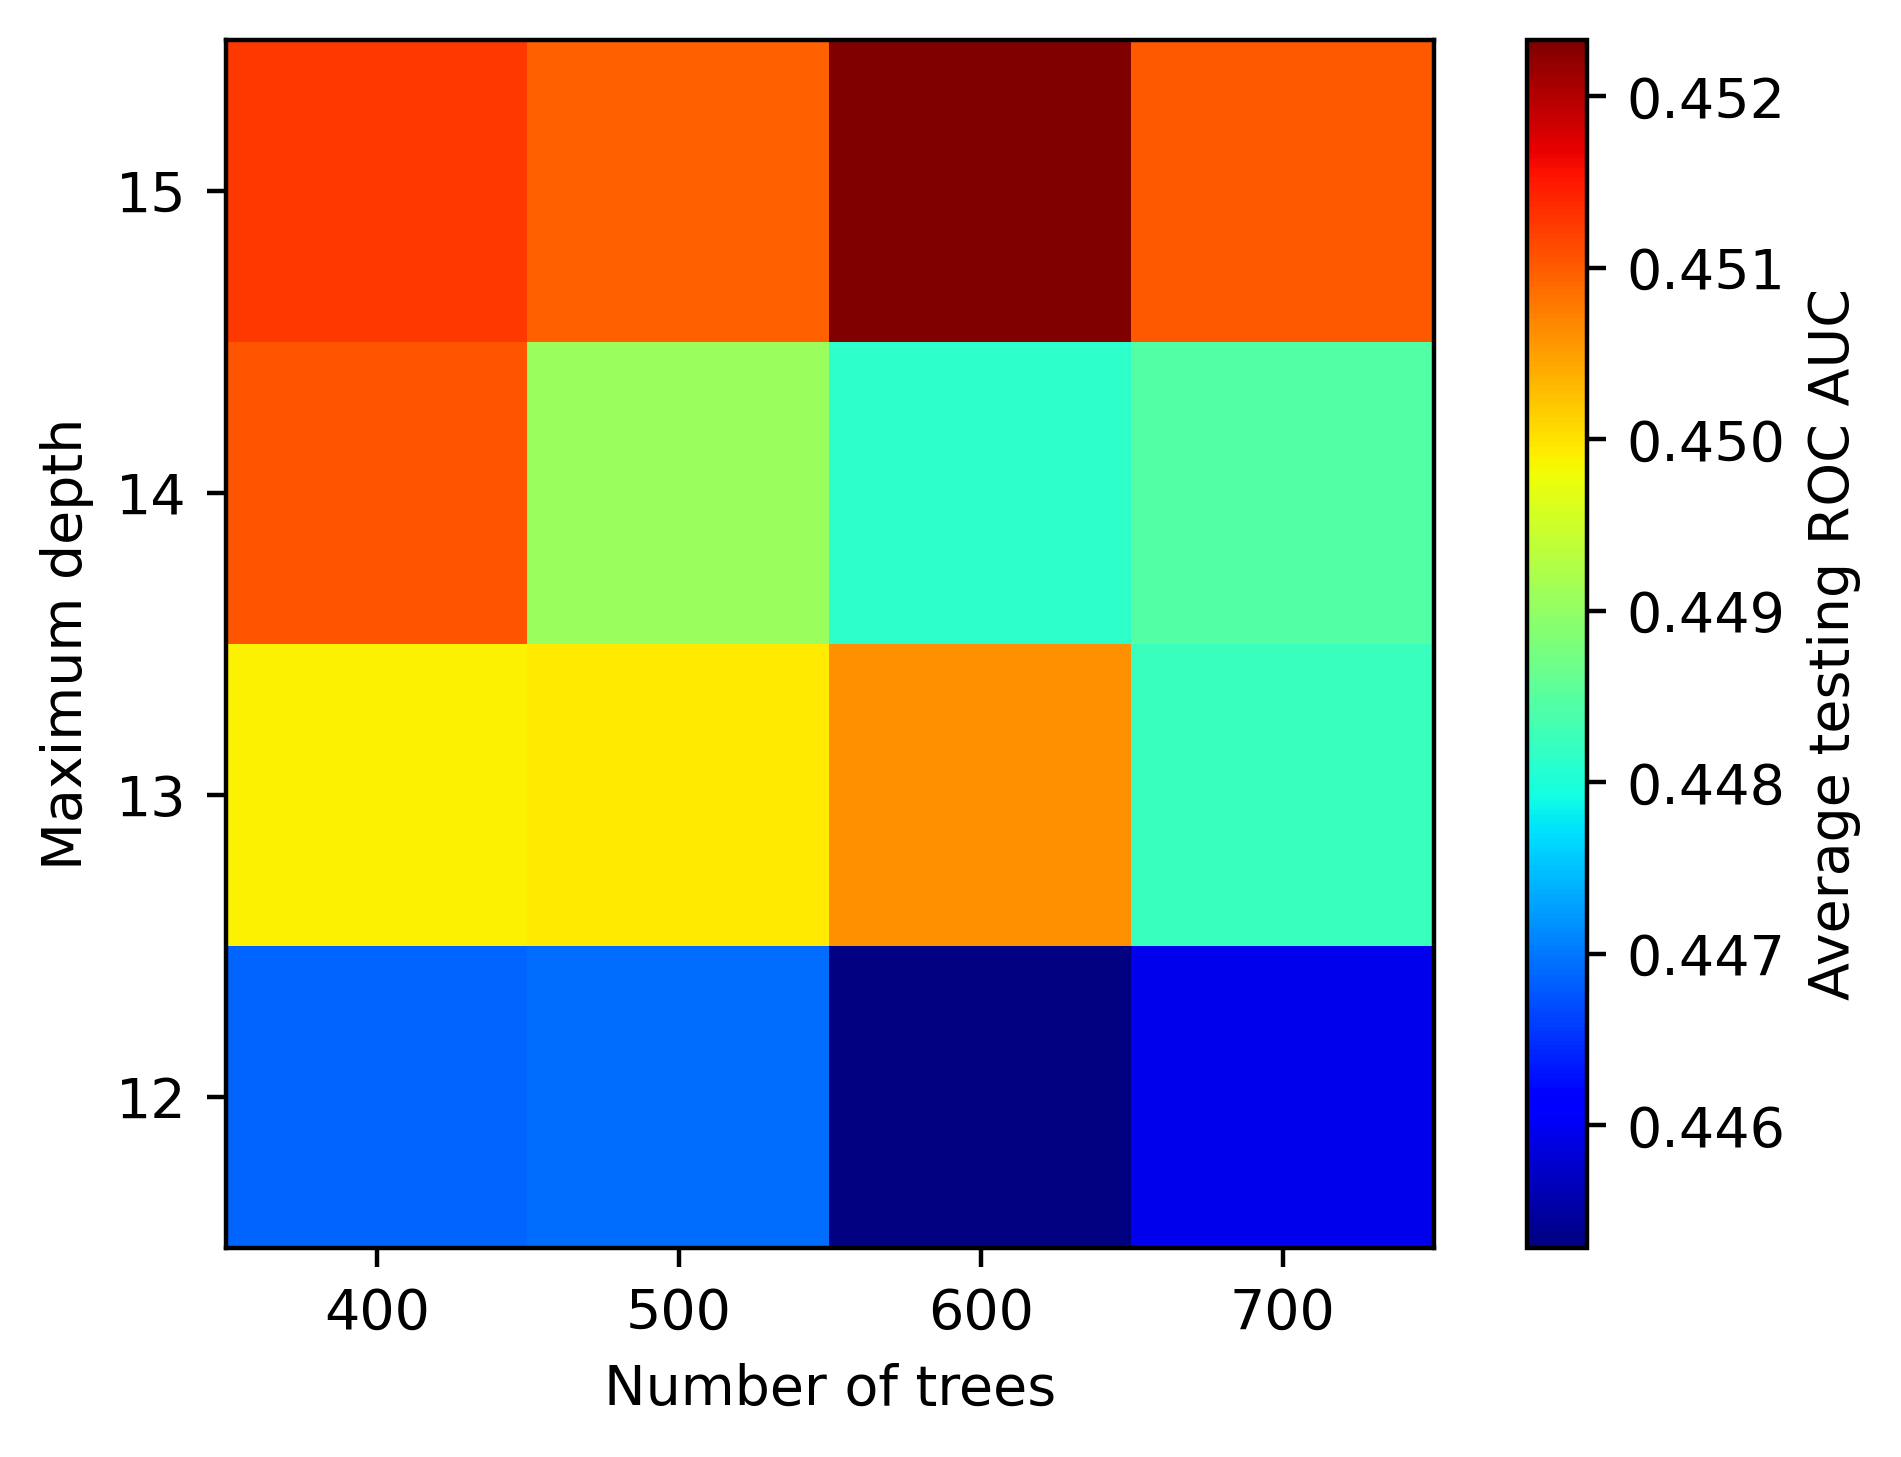

In [45]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [46]:
cv_rf.best_params_

{'max_depth': 15, 'n_estimators': 600}

In [48]:
rf = RandomForestClassifier\
(n_estimators=600, criterion='gini', max_depth=15,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf.score(x_test,y_test)

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8149208487706299

In [49]:
# Getting the results

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

Precision: 0.640
Recall: 0.320
Accuracy: 0.815
F1 Score: 0.427
ROC_AUC Score: 0.770


In [50]:
# Increasing the depth of trees to examine its effect on model performance

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

rf_params = {'max_depth':[16,18,20,22],
             'n_estimators':[400, 500, 600,700]}
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='f1',
                  n_jobs=-1, refit=True, cv=cv, verbose=2,
                  error_score=np.nan, return_train_score=True)
cv_rf.fit(x_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_depth=15, max_features='auto',
                                              n_estimators=600,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [16, 18, 20, 22],
                         'n_estimators': [400, 500, 600, 700]},
             return_train_score=True, scoring='f1', verbose=2)

In [51]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

Text(0, 0.5, 'Maximum depth')

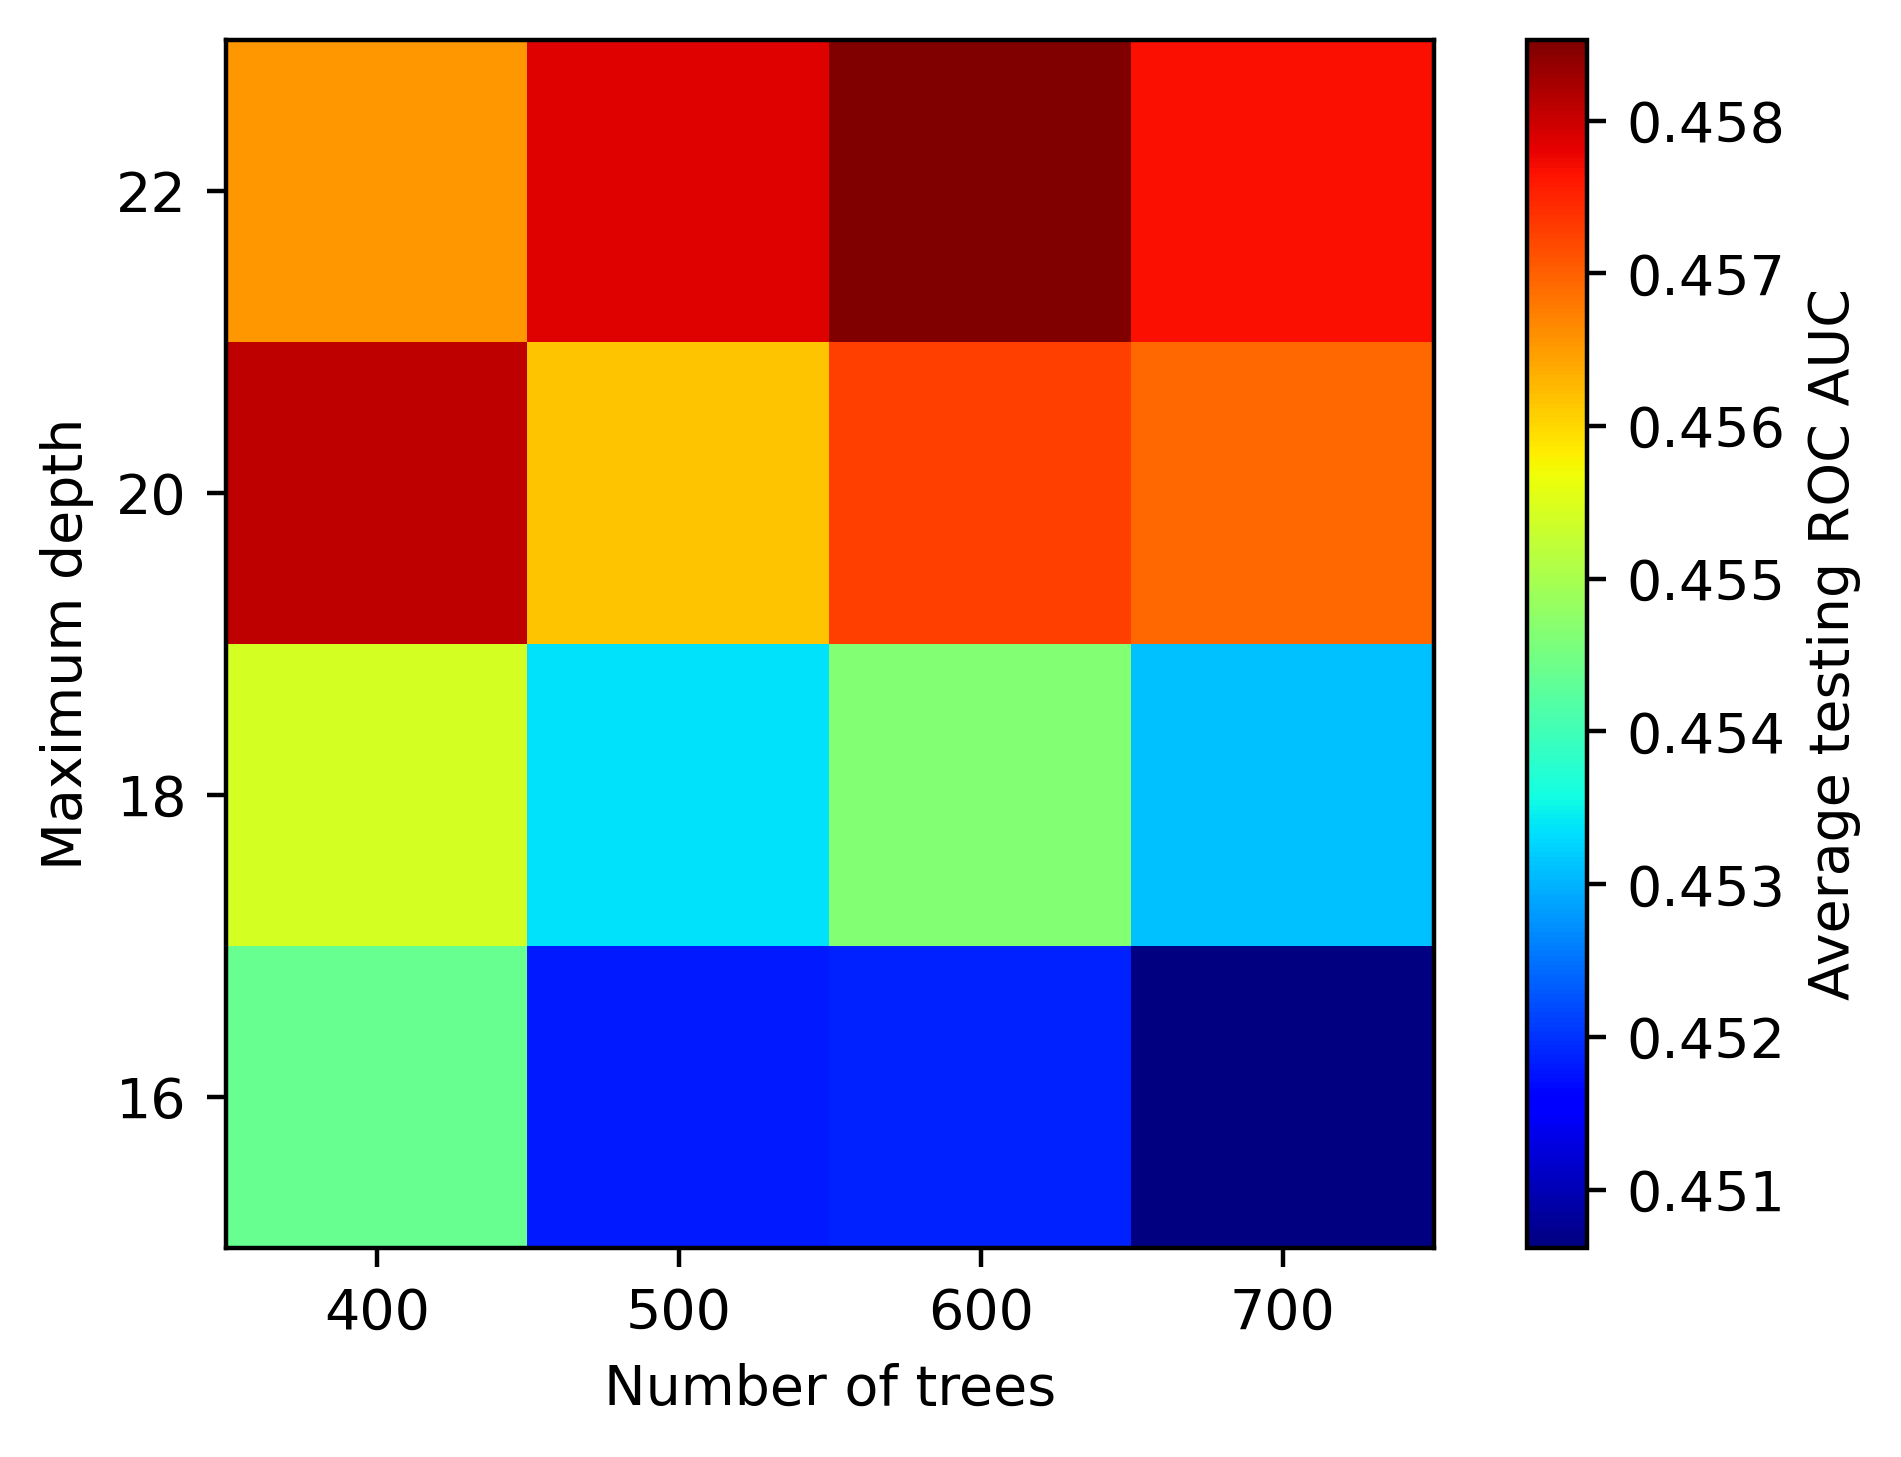

In [52]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [53]:
cv_rf.best_params_

{'max_depth': 22, 'n_estimators': 600}

In [54]:
rf = RandomForestClassifier\
(n_estimators=600, criterion='gini', max_depth=22,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf.score(x_test,y_test)

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8150892556416302

In [55]:
# Getting the results

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

Precision: 0.634
Recall: 0.333
Accuracy: 0.815
F1 Score: 0.436
ROC_AUC Score: 0.762


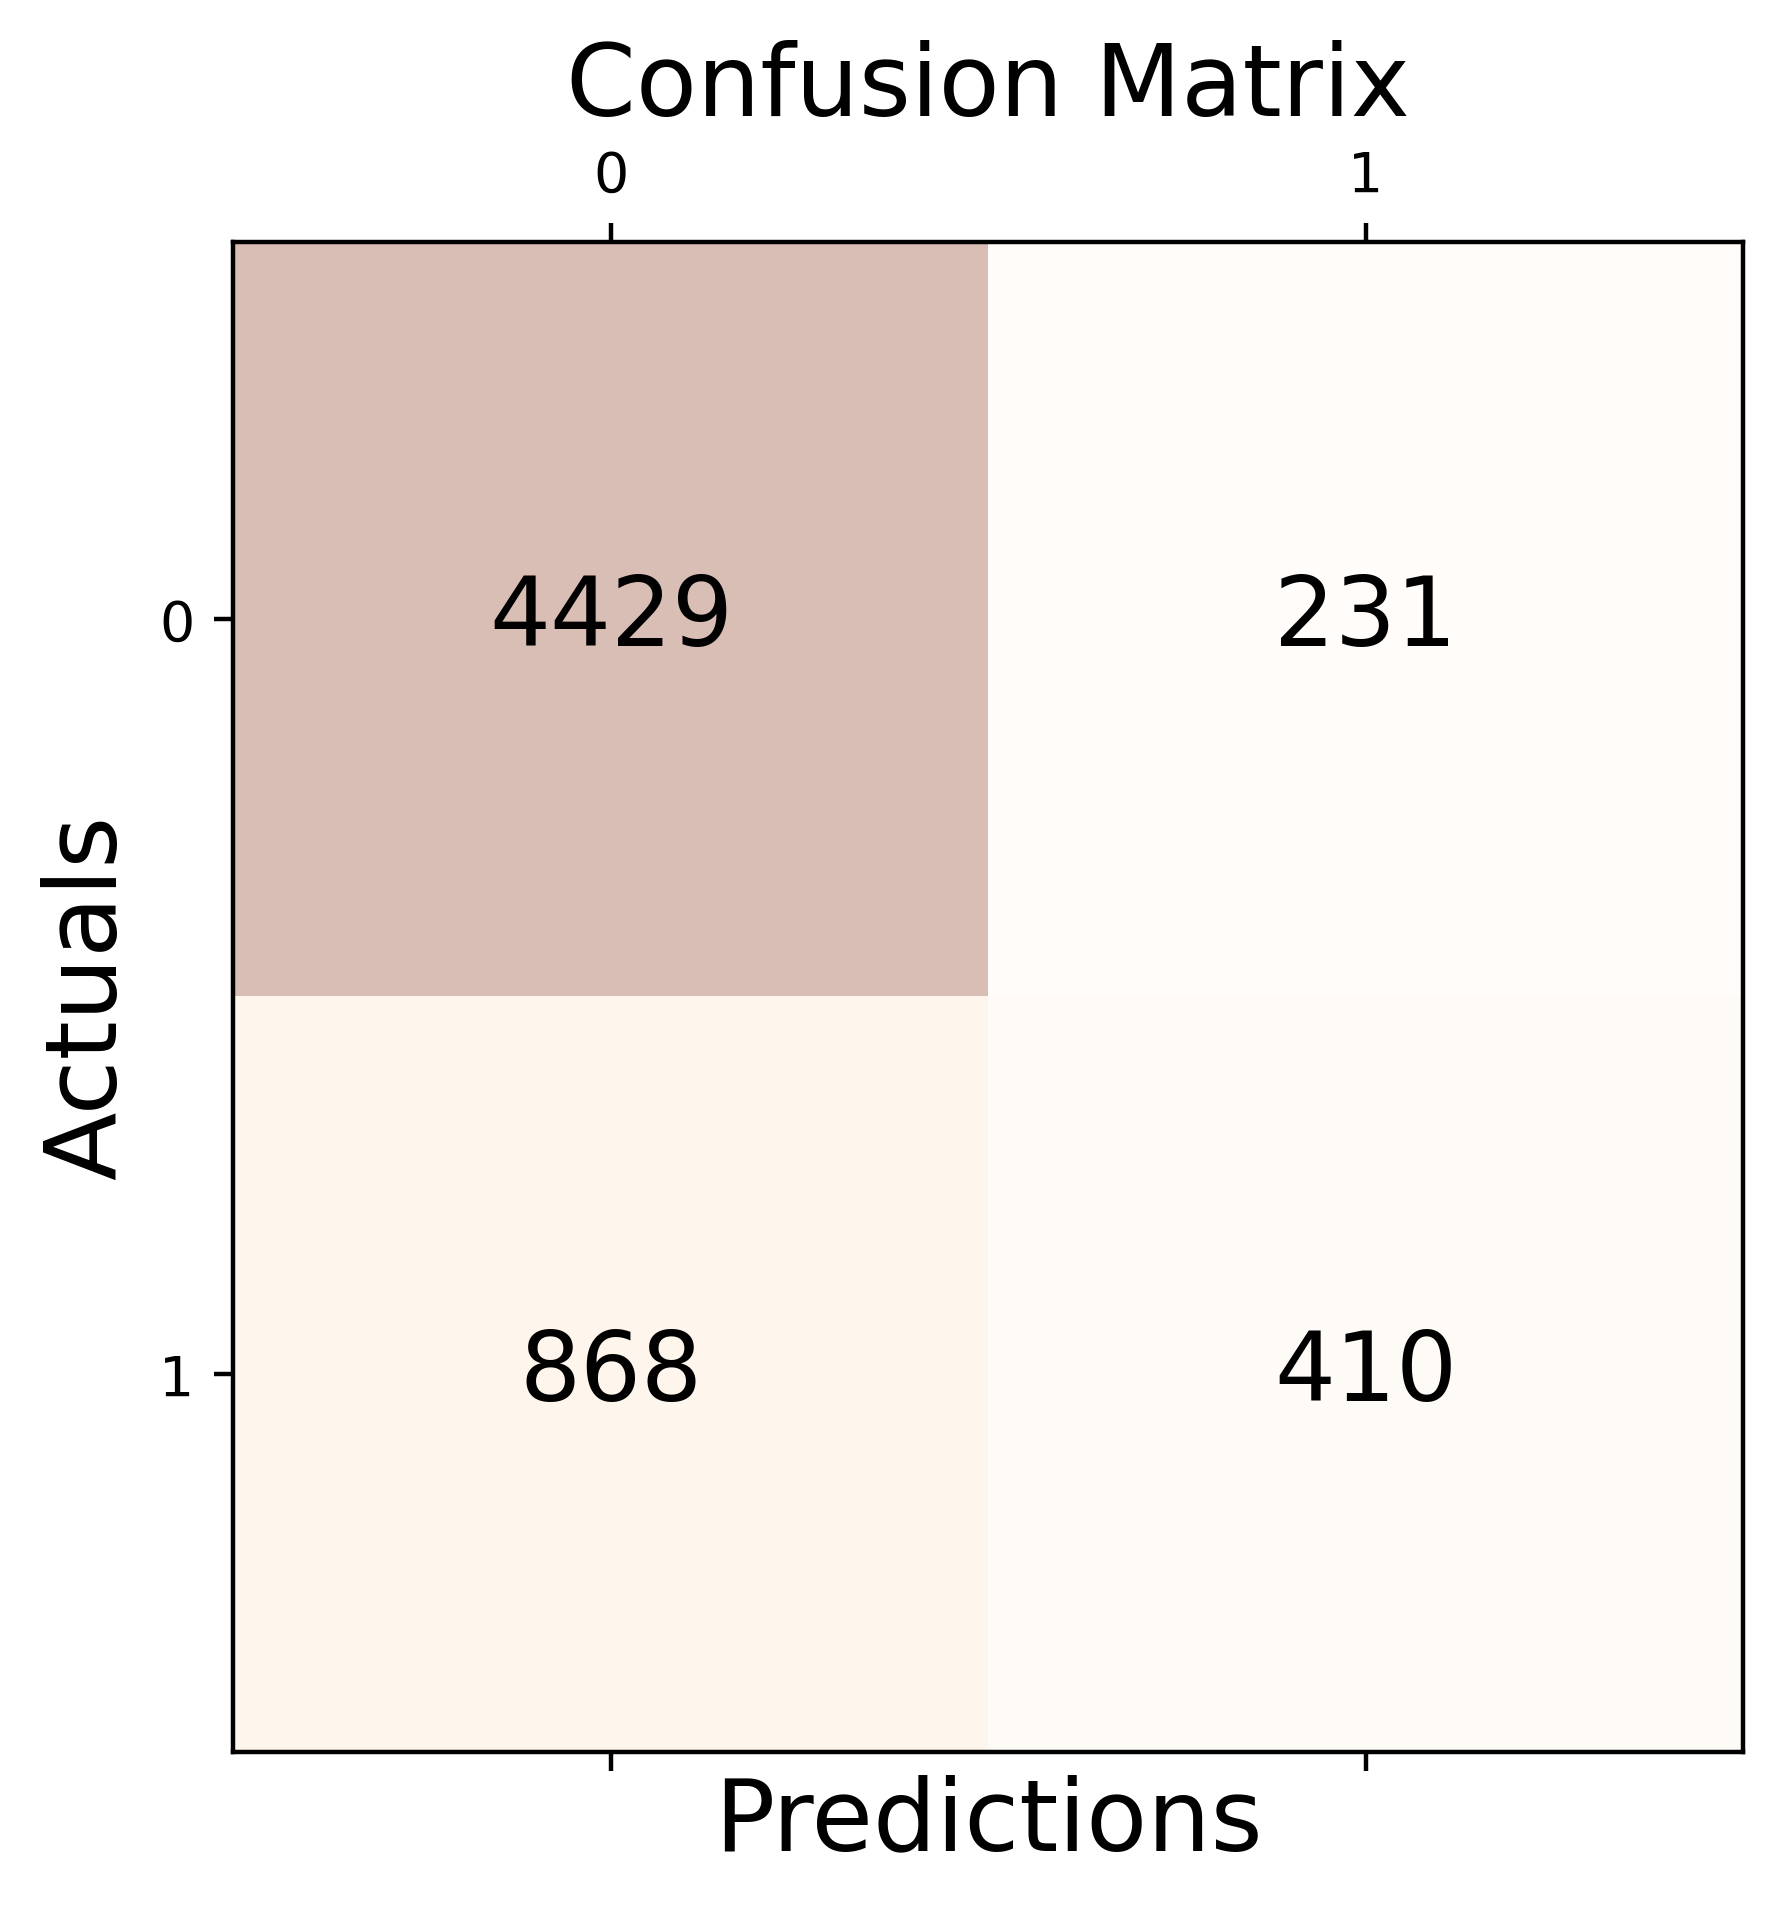

In [58]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()